In [7]:
import json

# Load the JSON data from a file
with open('soundcloudLogs.json', 'r') as file:
    data = json.load(file)

# Function to group logs by track name and collect counts over time
def group_logs_and_collect_counts(data):
    grouped_logs = {}
    for item in data:
        name = item.get('name', 'Unknown')
        log = item.get('soundcloudLog', {})
        if name not in grouped_logs:
            grouped_logs[name] = []
        grouped_logs[name].append(log)
    
    # Sort logs by logTime and extract counts
    counts_by_name = {}
    for name, logs in grouped_logs.items():
        logs.sort(key=lambda x: x['logTime'])
        counts_by_name[name] = [log['counts'] for log in logs]
    
    return counts_by_name

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)




In [4]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('soundcloudLogs.json', 'r') as file:
    data = json.load(file)

# Function to group logs by track name and collect counts over time
def group_logs_and_collect_counts(data):
    grouped_logs = {}
    for item in data:
        name = item.get('name', 'Unknown')
        log = item.get('soundcloudLog', {})
        if name not in grouped_logs:
            grouped_logs[name] = []
        grouped_logs[name].append(log)
    
    # Sort logs by logTime and extract counts
    counts_by_name = {}
    for name, logs in grouped_logs.items():
        logs.sort(key=lambda x: x['logTime'])
        counts_by_name[name] = [(log['logTime'], log['counts']) for log in logs]
    
    return counts_by_name

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)

# Plot counts for each song
'''
for name, counts in counts_by_name.items():
    log_times = [log_time for log_time, _ in counts]
    log_counts = [count for _, count in counts]
    plt.figure(figsize=(10, 5))
    plt.plot(log_times, log_counts, marker='o')
    plt.title(f"Counts over Time for '{name}'")
    plt.xlabel("Log Time")
    plt.ylabel("Counts")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

'''

    

'\nfor name, counts in counts_by_name.items():\n    log_times = [log_time for log_time, _ in counts]\n    log_counts = [count for _, count in counts]\n    plt.figure(figsize=(10, 5))\n    plt.plot(log_times, log_counts, marker=\'o\')\n    plt.title(f"Counts over Time for \'{name}\'")\n    plt.xlabel("Log Time")\n    plt.ylabel("Counts")\n    plt.grid(True)\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n\n'

In [22]:

import numpy as np

# Function to calculate gradient and report unusual changes
def analyze_gradients(counts_by_name):
    unusual_changes = {}
    for name, counts in counts_by_name.items():
        log_times = np.array([log_time for log_time, _ in counts])
        log_counts = np.array([count for _, count in counts])
        
        # Calculate the gradients
        gradients = np.gradient(log_counts, log_times)
        
        # Identify unusual changes
        avg_gradient = np.mean(gradients)
        std_gradient = np.std(gradients)
        threshold = avg_gradient + 4 * std_gradient
        
        unusual_points = []
        for i, gradient in enumerate(gradients):
            if gradient > threshold:
                unusual_points.append((log_times[i], log_counts[i], gradient))
        
        if unusual_points:
            unusual_changes[name] = unusual_points
    
    return unusual_changes

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)

# Analyze gradients and report unusual changes
unusual_changes = analyze_gradients(counts_by_name)

# Print unusual changes
for name, changes in unusual_changes.items():
    print(f"Unusual changes for '{name}':")
    for log_time, count, gradient in changes:
        print(f"  Log Time: {log_time}, Count: {count}, Gradient: {gradient}")


Unusual changes for '5AM':
  Log Time: 1717612215389, Count: 5512, Gradient: 1.5046296329786262e-07
Unusual changes for 'Abraye Tire':
  Log Time: 1717967251465, Count: 56759, Gradient: 1.9946551905788285e-06
Unusual changes for 'Are':
  Log Time: 1717439415390, Count: 167399, Gradient: 0.0014610532576510794
Unusual changes for 'Az Yeja Be Baad':
  Log Time: 1718328998630, Count: 516300, Gradient: 5.664930572796094e-05
Unusual changes for 'BABA':
  Log Time: 1718328998630, Count: 413550, Gradient: 1.964699073015797e-05
Unusual changes for 'BAGHALET':
  Log Time: 1720820041257, Count: 14263, Gradient: 5.842135896708962e-07
Unusual changes for 'BOB ROSS':
  Log Time: 1717967251465, Count: 57682, Gradient: 2.149084468029694e-06
Unusual changes for 'Be Qiafat Nemiad':
  Log Time: 1721869016225, Count: 819204, Gradient: 0.00030702546388641
Unusual changes for 'Butterfly':
  Log Time: 1718765817007, Count: 68371, Gradient: 0.0004962094906690727
Unusual changes for 'Candy':
  Log Time: 171867

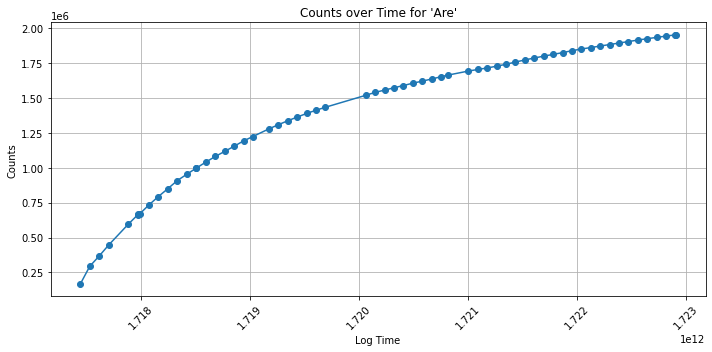

In [36]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data from a file
with open('soundcloudLogs.json', 'r') as file:
    data = json.load(file)

# Function to group logs by track name and collect counts over time
def group_logs_and_collect_counts(data):
    grouped_logs = {}
    for item in data:
        name = item.get('name', 'Unknown')
        log = item.get('soundcloudLog', {})
        if name not in grouped_logs:
            grouped_logs[name] = []
        grouped_logs[name].append(log)
    
    # Sort logs by logTime and extract counts
    counts_by_name = {}
    for name, logs in grouped_logs.items():
        logs.sort(key=lambda x: x['logTime'])
        counts_by_name[name] = [(log['logTime'], log['counts']) for log in logs]
    
    return counts_by_name

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)

# Function to plot counts for a specific track
def plot_counts_for_track(track_name, counts_by_name):
    if track_name in counts_by_name:
        counts = counts_by_name[track_name]
        log_times = [log_time for log_time, _ in counts]
        log_counts = [count for _, count in counts]
        
        plt.figure(figsize=(10, 5))
        plt.plot(log_times, log_counts, marker='o')
        plt.title(f"Counts over Time for '{track_name}'")
        plt.xlabel("Log Time")
        plt.ylabel("Counts")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Track '{track_name}' not found in the data.")

# Example usage
track_name = "Are"  # Replace with the name of the track you want to plot
plot_counts_for_track(track_name, counts_by_name)


In [13]:
import numpy as np

# Function to analyze counts and detect significant changes
def analyze_significant_changes(counts_by_name, threshold=30000):
    significant_changes = {}
    for name, counts in counts_by_name.items():
        log_times = np.array([log_time for log_time, _ in counts])
        log_counts = np.array([count for _, count in counts])
        
        # Calculate the differences between consecutive counts
        count_diffs = np.diff(log_counts)
        
        significant_points = []
        for i, diff in enumerate(count_diffs):
            if abs(diff) >= threshold:
                significant_points.append((log_times[i + 1], log_counts[i + 1], diff))
        
        if significant_points:
            significant_changes[name] = significant_points
    
    return significant_changes

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)

# Analyze significant changes with a threshold of 30,000
significant_changes = analyze_significant_changes(counts_by_name, threshold=30000)

# Print significant changes
for name, changes in significant_changes.items():
    print(f"Significant changes for '{name}':")
    for log_time, count, diff in changes:
        print(f"  Log Time: {log_time}, Count: {count}, Change: {diff}")


Significant changes for '3AM':
  Log Time: 1720060951447, Count: 1861548, Change: 39229
  Log Time: 1720147351443, Count: 241650, Change: -1629941
  Log Time: 1720233751444, Count: 1879996, Change: 1638346
  Log Time: 1720233751444, Count: 241905, Change: -1638091
  Log Time: 1720320151443, Count: 1889182, Change: 1647277
  Log Time: 1720320151443, Count: 242176, Change: -1647006
  Log Time: 1720407194966, Count: 1898188, Change: 1656012
  Log Time: 1720407194966, Count: 242426, Change: -1655762
  Log Time: 1720493594964, Count: 1907836, Change: 1665410
  Log Time: 1720493594964, Count: 242711, Change: -1665125
  Log Time: 1720579994962, Count: 1917531, Change: 1674820
  Log Time: 1720579994962, Count: 242959, Change: -1674572
  Log Time: 1720666394963, Count: 1926640, Change: 1683681
  Log Time: 1720666394963, Count: 243288, Change: -1683352
  Log Time: 1720752794963, Count: 1936110, Change: 1692822
  Log Time: 1720752794963, Count: 243627, Change: -1692483
  Log Time: 1720820041257, 

In [33]:
import numpy as np
from scipy.optimize import curve_fit
import json

# Load the JSON data from a file
with open('soundcloudLogs.json', 'r') as file:
    data = json.load(file)

# Function to group logs by track name and collect counts over time
def group_logs_and_collect_counts(data):
    grouped_logs = {}
    for item in data:
        name = item.get('name', 'Unknown')
        log = item.get('soundcloudLog', {})
        if name not in grouped_logs:
            grouped_logs[name] = []
        grouped_logs[name].append(log)
    
    # Sort logs by logTime and extract counts
    counts_by_name = {}
    for name, logs in grouped_logs.items():
        logs.sort(key=lambda x: x['logTime'])
        counts_by_name[name] = [(log['logTime'], log['counts']) for log in logs]
    
    return counts_by_name

# Polynomial model function
def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

# Function to fit polynomial model and calculate least square error
def fit_polynomial_and_calculate_error(counts_by_name):
    errors = []
    for name, counts in counts_by_name.items():
        log_times = np.array([log_time for log_time, _ in counts])
        log_counts = np.array([count for _, count in counts])

        # Ensure there are enough data points to fit the model
        if len(log_times) < 3:
            continue

        # Normalize log times to improve fitting
        log_times_norm = log_times - log_times.min()

        # Fit polynomial model
        try:
            popt, _ = curve_fit(polynomial_model, log_times_norm, log_counts)
            fitted_counts = polynomial_model(log_times_norm, *popt)
            error = np.sum((log_counts - fitted_counts) ** 2)
            errors.append((name, error))
        except RuntimeError:
            # If the fitting fails, assign a large error
            errors.append((name, float('inf')))
        except Exception as e:
            # Catch other potential exceptions
            print(f"Error fitting data for {name}: {e}")
            errors.append((name, float('inf')))
    
    return errors

# Group logs and collect counts
counts_by_name = group_logs_and_collect_counts(data)

# Fit polynomial model and calculate errors
errors = fit_polynomial_and_calculate_error(counts_by_name)

# Sort by least square error in descending order and report the top 50
errors.sort(key=lambda x: x[1], reverse=True)
top_50_errors = errors[:50]

# Print the top 50 songs with the largest least square errors
print("Top 50 songs with the largest least square errors:")
for name, error in top_50_errors:
    print(f"Song: {name}, Least Square Error: {error}")



Top 50 songs with the largest least square errors:
Song: PILE, Least Square Error: 4609864384322819.0
Song: tttpttt, Least Square Error: 3801964195673351.5
Song: Shanbe, Least Square Error: 1852795278888989.5
Song: Telesm, Least Square Error: 149313189580398.75
Song: Del, Least Square Error: 93063245149737.28
Song: Eshgh, Least Square Error: 88618047650200.06
Song: 3AM, Least Square Error: 87085614941309.23
Song: Hanoozam, Least Square Error: 66001127585865.97
Song: Ye Psycho (Acoustic Version), Least Square Error: 57391718264322.05
Song: Cartel, Least Square Error: 52376386710095.42
Song: Are, Least Square Error: 48276245188625.17
Song: Yallah, Least Square Error: 35273414782552.8
Song: Tehran, Least Square Error: 34253866431444.156
Song: Ki, Least Square Error: 15764298981806.945
Song: 3TARE, Least Square Error: 10503008342674.543
Song: The Goat Of Wall Street, Least Square Error: 8287620778402.622
Song: Candy, Least Square Error: 7922907602682.905
Song: Romania, Least Square Error: 